<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **1.3.1 QR Decomposition**

QR decomposition is a process in linear algebra where a matrix $A$ is factored into the product of two matrices: an orthogonal matrix $Q$ and an upper triangular matrix $R$. This decomposition is particularly useful for solving linear systems, least-squares problems, and eigenvalue computations.

The decomposition is represented as: $A=QR$ where:
* $A$ is the original matrix (usually of size $m \times n$)
* $Q$ is an orthogonal matrix (of size $m \times m$), where $Q$ is a $\mathbb{R}^{n \times m}$ with $Q^TQ=I_{m \times m}$ where $I$ is the identity matrix
* $R$ is an upper triangular matrix (of size $m \times n$).


This example demonstrates how to perform QR decomposition on a matrix using NumPy's built-in function. The QR decomposition expresses the matrix as the product of an orthogonal matrix $Q$ and an upper triangular matrix $R$.

In [ ]:
# Define a matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Perform QR decomposition
Q, R = np.linalg.qr(A)

# Output the orthogonal and upper triangular matrices
print("Orthogonal matrix Q:\n", Q)
print("Upper triangular matrix R:\n", R)

Orthogonal matrix Q:
 [[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
Upper triangular matrix R:
 [[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


Here I verify that by multiplying the orthogonal and upper triangular matrices, I can reproduce the original matrix.

In [ ]:
# Verify that A = QR
A2 = np.dot(Q, R)
print("Reconstructed matrix A:\n", A2)

Reconstructed matrix A:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


The text mentions that it may be easier to verify $A^T \times R^T Q^T$.  Here we use numpy to prove that with our matrices as well.

In [ ]:
# Output the original matrix transpose
AT = A.transpose()
print(AT)

# Multiply R^T x Q^T
A3 = np.dot(R.transpose(), Q.transpose())

# output to confirm
print(A3)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]


# **1.3.2 Least-Squares Problems**

Least Squares is a method used to approximate the solution to a system of linear equations when an exact solution does not exist, typically in the case of an overdetermined system (i.e., when there are more equations than unknowns). The least-squares method minimizes the sum of the squared differences (or residuals) between the observed values and the values predicted by the model.

Solving the Least-Squares Problem:
* The least-squares solution $x$ can be found by solving the normal equations: $A^T Ax = A^Tb$
  * The text points out that this approach has "numerical issues"
* A more stable method is to use QR decomposition. By decomposing $A$ into an orthogonal matrix $Q$ and an upper triangular matrix $R$ ($A=QR$ as described above in section 1.3.1), we can solve the least-squares problem by reducing it to solving a simpler system: $Rx^*=Q^Tb$.

This example solves an overdetermined system of linear equations using the least-squares method in numpy.

In [ ]:
# Define matrix A and vector b
A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([1, 2, 2])

# Solve the least-squares problem
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Output the solution
print("Solution vector x:", x)
print("Residuals:", residuals)

Solution vector x: [0.66666667 0.5       ]
Residuals: [0.16666667]


This example uses the QR decomposition method.

In [ ]:
# Perform QR decomposition
Q, R = np.linalg.qr(A)

# Solve R * x = Q.T * b for x
x_ls = np.linalg.solve(R, np.dot(Q.T, b))
print("Least-squares solution using QR decomposition:", x_ls)


Least-squares solution using QR decomposition: [0.66666667 0.5       ]


This example uses the normal equations method

In [ ]:
# Compute the normal equations A^T A and A^T b
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, b)

# Solve for x using the normal equations
x = np.linalg.solve(AtA, Atb)

# Output the solution
print("Solution vector x:", x)


Solution vector x: [0.66666667 0.5       ]


# **1.3.3 Linear Regression**

Given input data points $\{(x_i, y_i)\}^{n}_{i=1}$ with each $x_i = (x_{i1}, ..., x_{id})^T$ we can take the common approach to fit the data such that:
$\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$, where $\hat{y} = \beta_0 + \sum_{j=1}^{d} \beta_jx_{ij}$ can be viewed as the predicted values of the linear model with coefficients $\beta_j$.

The result is that this is exactly the least squares problem described above.

This example demonstrates how to fit a linear regression model using the least-squares approach. It finds the best-fitting line for a set of data points.

Regression coefficients (intercept, slope): [-1.   2.2]


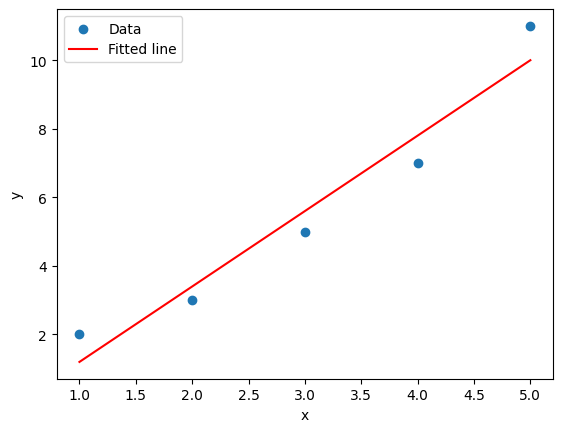

In [ ]:
# Define data points (x, y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Create the design matrix (A = [1, x])
A = np.vstack([np.ones(len(x)), x]).T

# Solve the least-squares problem to find the regression coefficients
coeffs, _, _, _ = np.linalg.lstsq(A, y, rcond=None)

# Output the coefficients
print("Regression coefficients (intercept, slope):", coeffs)

# Plot the data points and the fitted line
plt.scatter(x, y, label="Data")
plt.plot(x, coeffs[0] + coeffs[1] * x, 'r', label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
